In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)

In [2]:
url = 'https://raw.githubusercontent.com/Apress/applied-recommender-systems-python/main/Data/data.csv'
df = pd.read_csv(url, encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Check missing values

df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# Drop missing value

df = df.dropna(subset=['Description'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
print(df.describe())
print(df.shape)

            Quantity      UnitPrice     CustomerID
count  540455.000000  540455.000000  406829.000000
mean        9.603129       4.623519   15287.690570
std       218.007598      96.889628    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
(540455, 8)


In [9]:
df_new = df[df['Quantity'] > 0]
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Popularity Based Recommendation System

In [10]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Global Popular Item

In [13]:
global_pop = df_new.pivot_table(index=['StockCode','Description'], 
            values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False)
print('Top 10 popular items are:')
global_pop.head(10)

Top 10 popular items are:


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


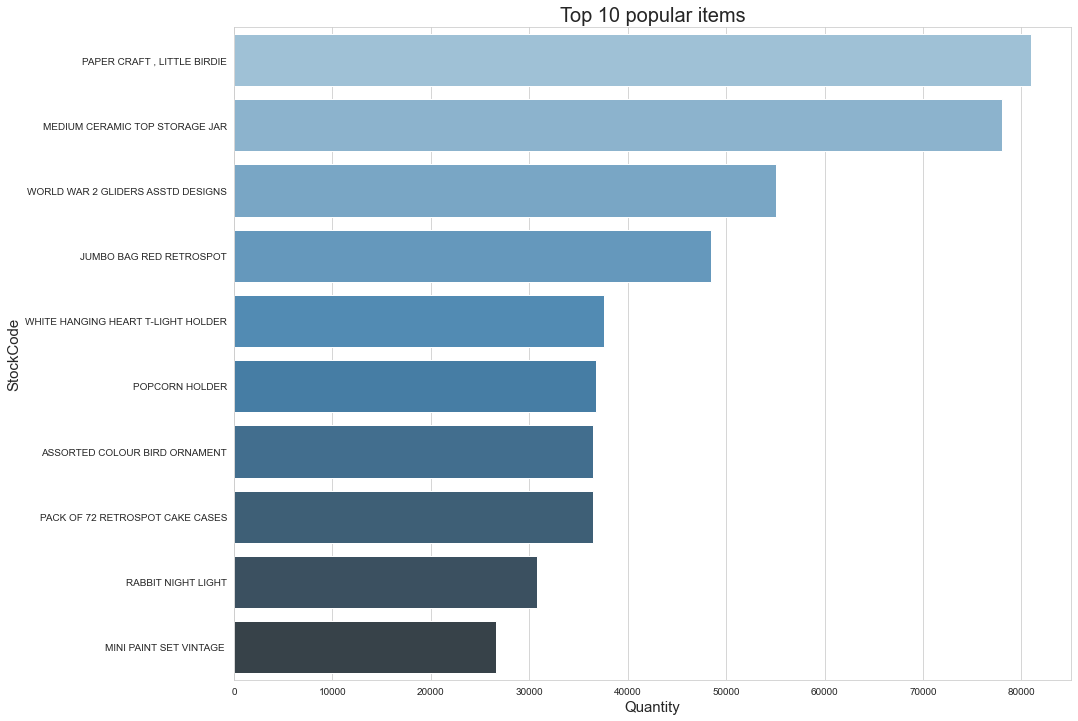

In [16]:
# Visualize the top 10 popular items

global_pop = global_pop.reset_index()
sns.barplot(data = global_pop.head(10), x='Quantity', y='Description', palette='Blues_d')
plt.title('Top 10 popular items', fontsize=20)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('StockCode', fontsize=15)
plt.show()


In [17]:
country_wise = df_new.pivot_table(index=['Country','StockCode','Description'],
            values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False)
print('Top 10 popular items in each country are:')
country_wise.head(10)

Top 10 popular items in each country are:


Quantity
Country        StockCode Description                                 
United Kingdom 23843     PAPER CRAFT , LITTLE BIRDIE            80995
               23166     MEDIUM CERAMIC TOP STORAGE JAR         77036
               84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS      49526
               85099B    JUMBO BAG RED RETROSPOT                44268
               85123A    WHITE HANGING HEART T-LIGHT HOLDER     35452
               22197     POPCORN HOLDER                         34738
               84879     ASSORTED COLOUR BIRD ORNAMENT          33735
               22616     PACK OF 12 LONDON TISSUES              25331
               21212     PACK OF 72 RETROSPOT CAKE CASES        24986
               22178     VICTORIAN GLASS HANGING T-LIGHT        23692

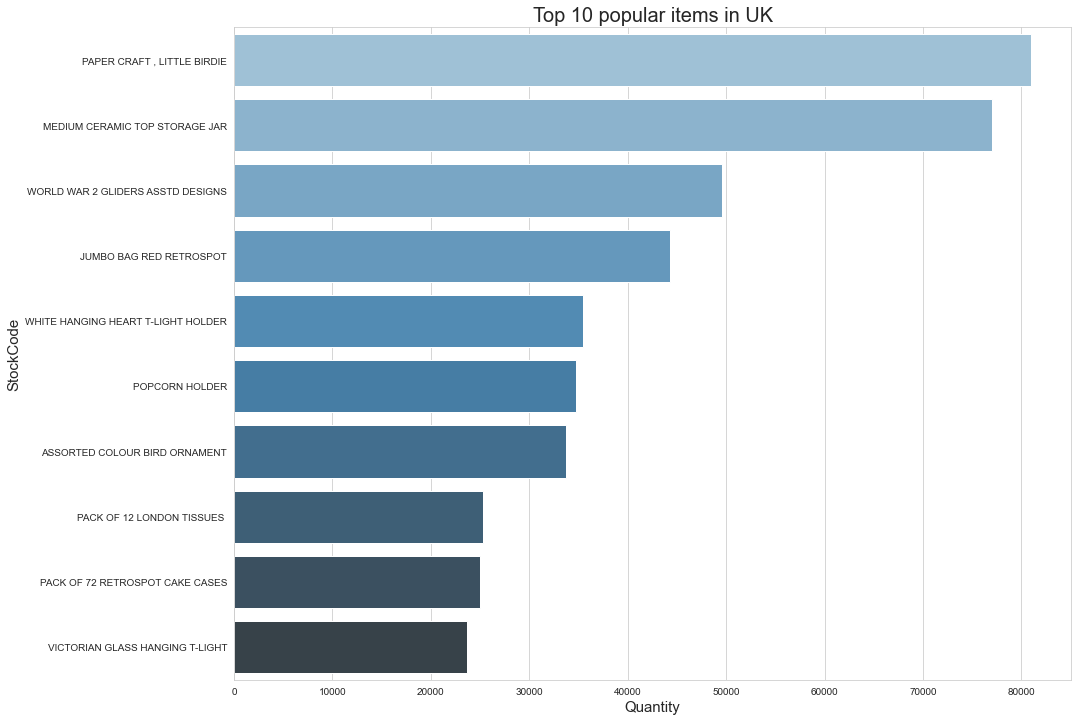

In [18]:
country_wise = country_wise.reset_index()
sns.barplot(data = country_wise[country_wise['Country'] == 'United Kingdom'].head(10),
            x='Quantity', y='Description', palette='Blues_d')
plt.title('Top 10 popular items in UK', fontsize=20)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('StockCode', fontsize=15)
plt.show()

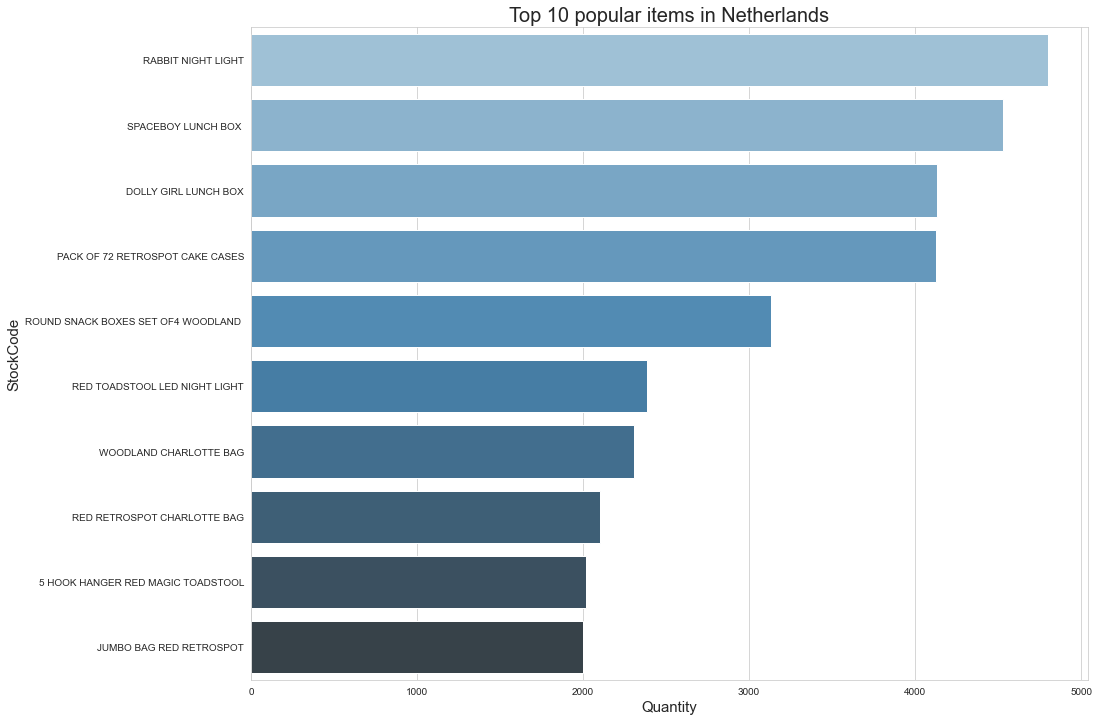

In [19]:
sns.barplot(data = country_wise[country_wise['Country'] == 'Netherlands'].head(10),
            x='Quantity', y='Description', palette='Blues_d')
plt.title('Top 10 popular items in Netherlands', fontsize=20)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('StockCode', fontsize=15)
plt.show()


In [20]:
# Create function buy again output from 

from collections import Counter

In [22]:
def buy_again(customer_id):
     # Fetching the items bought by the customer for provided customers id
     item_bought = df_new[df_new['CustomerID'] == customer_id].Description
     # Count and sort the repeeated items
     bought_again = Counter(item_bought).most_common()
     # Convert the counter to list for printing recommended items
     bought_again = list(bought_again)
     # Print the recommended items
     print('Recommended items for customer id {} are:'.format(customer_id))
     return bought_again
     


In [24]:
buy_again(17850)

Recommended items for customer id 17850 are:


[('WHITE HANGING HEART T-LIGHT HOLDER', 17),
 ('WHITE METAL LANTERN', 17),
 ('KNITTED UNION FLAG HOT WATER BOTTLE', 17),
 ('RED WOOLLY HOTTIE WHITE HEART.', 17),
 ('GLASS STAR FROSTED T-LIGHT HOLDER', 17),
 ('HAND WARMER UNION JACK', 17),
 ('HAND WARMER RED POLKA DOT', 17),
 ('SET 7 BABUSHKA NESTING BOXES', 16),
 ('CREAM CUPID HEARTS COAT HANGER', 15),
 ('RETRO COFFEE MUGS ASSORTED', 15),
 ('VINTAGE BILLBOARD DRINK ME MUG', 15),
 ('VINTAGE BILLBOARD LOVE/HATE MUG', 15),
 ('WOOD 2 DRAWER CABINET WHITE FINISH', 15),
 ('WOODEN PICTURE FRAME WHITE FINISH', 15),
 ('WOODEN FRAME ANTIQUE WHITE ', 15),
 ('SAVE THE PLANET MUG', 14),
 ('WOOD S/3 CABINET ANT WHITE FINISH', 14),
 ('JUMBO SHOPPER VINTAGE RED PAISLEY', 10),
 ('IVORY EMBROIDERED QUILT ', 8),
 ('EDWARDIAN PARASOL RED', 7),
 ('EDWARDIAN PARASOL BLACK', 4)]

In [25]:
# store df_new

%store df_new

Stored 'df_new' (DataFrame)
